In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


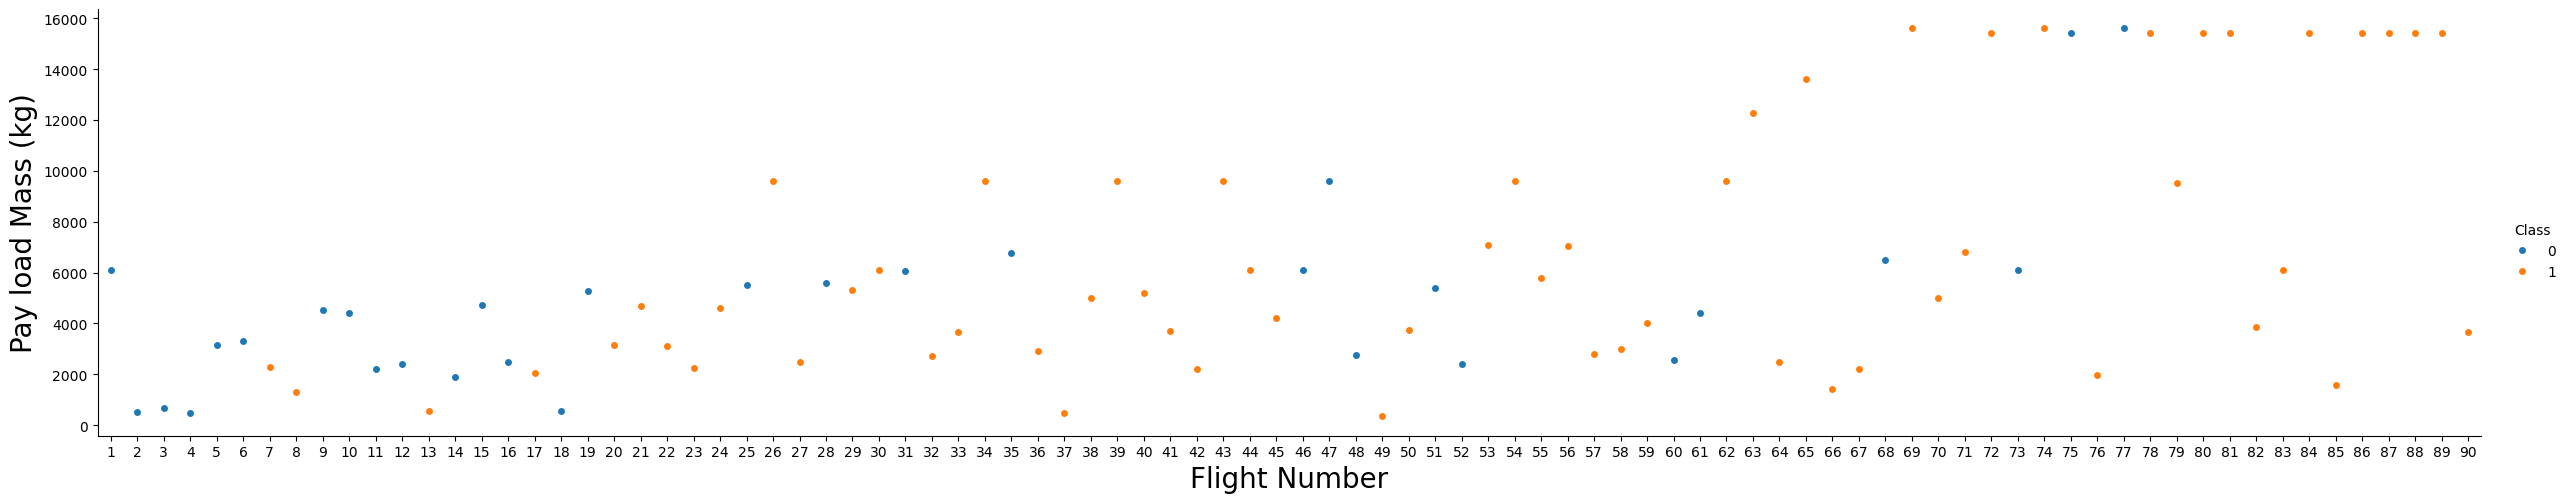

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [5]:

df['Date'] = df['Date'].str.split('-').str[0]  


df.groupby('Date')['SuccessRate'].mean().plot(kind='line', title='Éxito de Aterrizaje (2013-2020)')

<class 'KeyError'>: 'Column not found: SuccessRate'

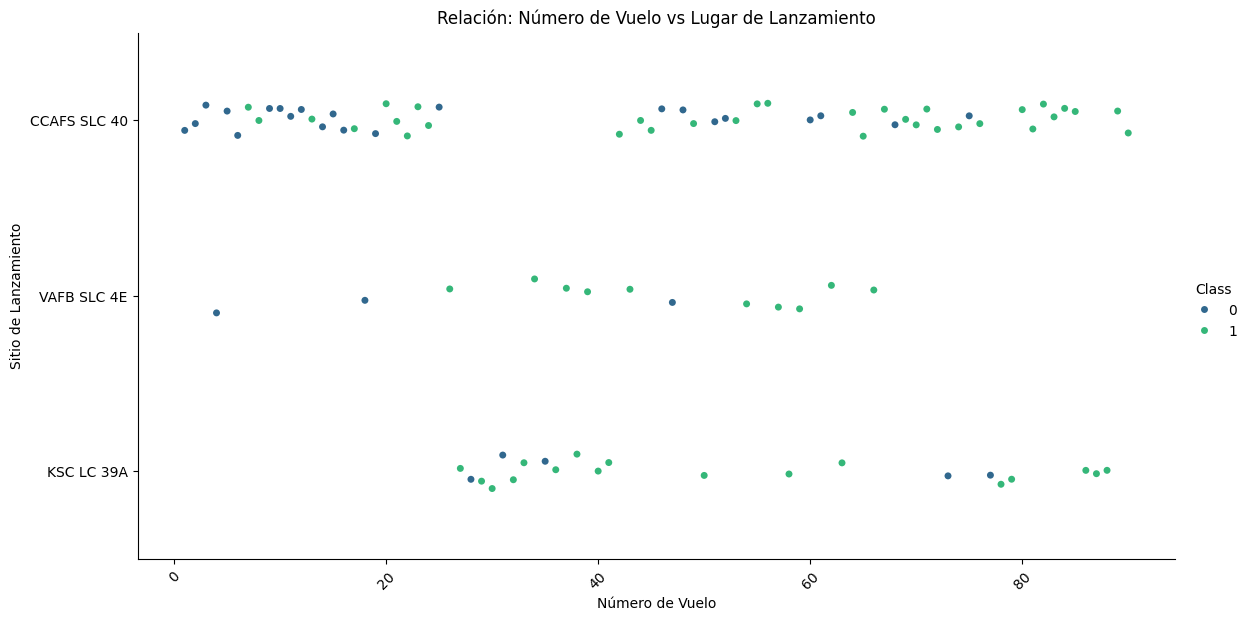

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el gráfico
sns.catplot(
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class",  # Asegúrate de que la columna se llama 'Class' (1=éxito, 0=fallo)
    data=df,
    kind="strip",  # Tipo de gráfico (puntos dispersos)
    height=6, 
    aspect=2,  # Relación altura/ancho
    palette="viridis"  # Estilo de colores
)

# Personalizar ejes y título
plt.title("Relación: Número de Vuelo vs Lugar de Lanzamiento")
plt.xlabel("Número de Vuelo")
plt.ylabel("Sitio de Lanzamiento")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario

# Mostrar el gráfico
plt.show()

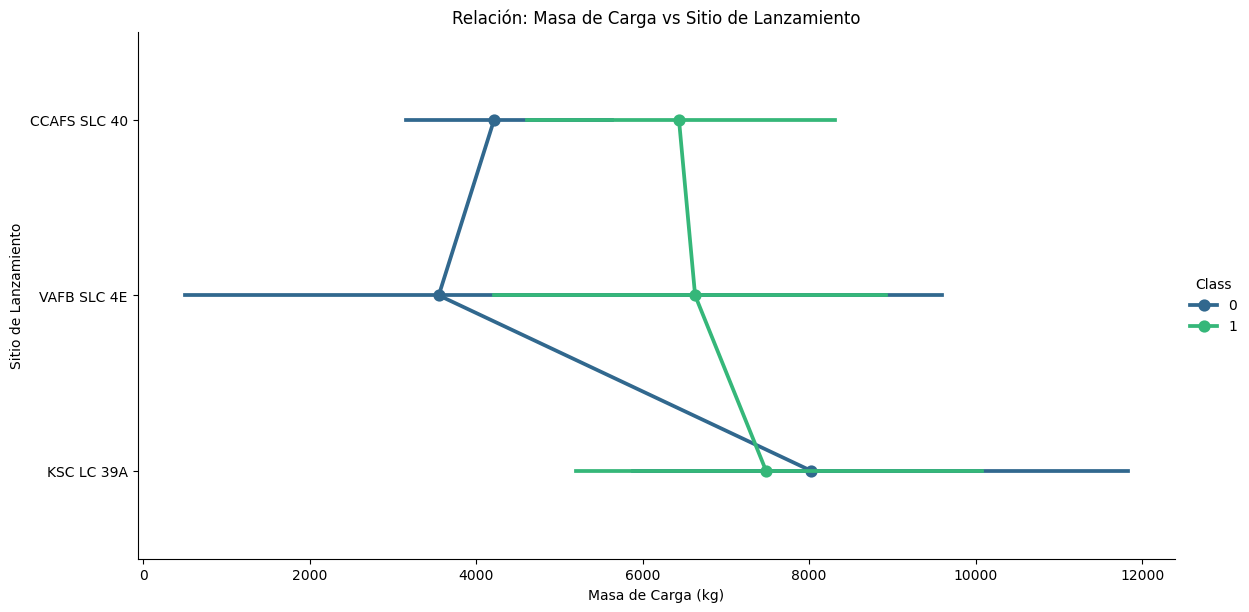

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class", 
    data=df,
    kind="point",
    height=6,
    aspect=2,
    palette="viridis"
)

plt.title("Relación: Masa de Carga vs Sitio de Lanzamiento")
plt.xlabel("Masa de Carga (kg)")
plt.ylabel("Sitio de Lanzamiento")
plt.show()

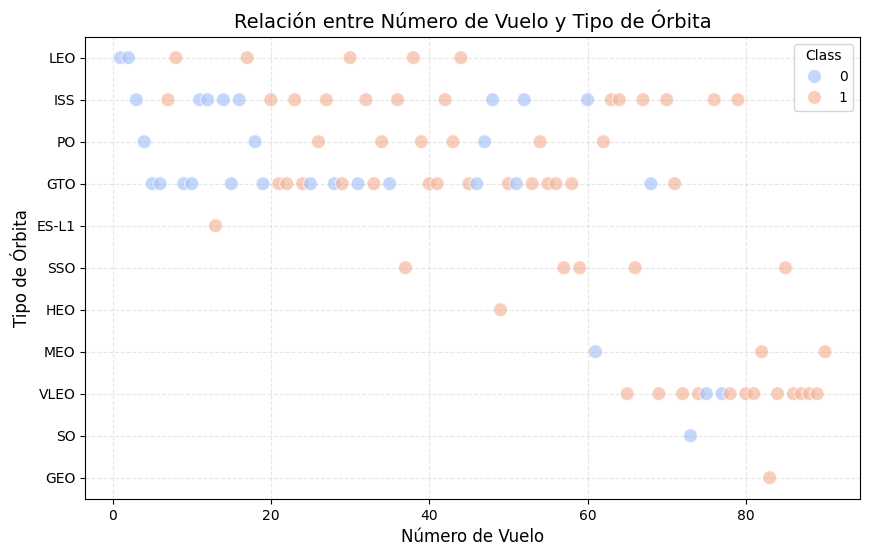

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='FlightNumber',
    y='Orbit',
    hue='Class',
    data=df,
    palette='coolwarm',
    s=100,
    alpha=0.7
)

plt.title('Relación entre Número de Vuelo y Tipo de Órbita', fontsize=14)
plt.xlabel('Número de Vuelo', fontsize=12)
plt.ylabel('Tipo de Órbita', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

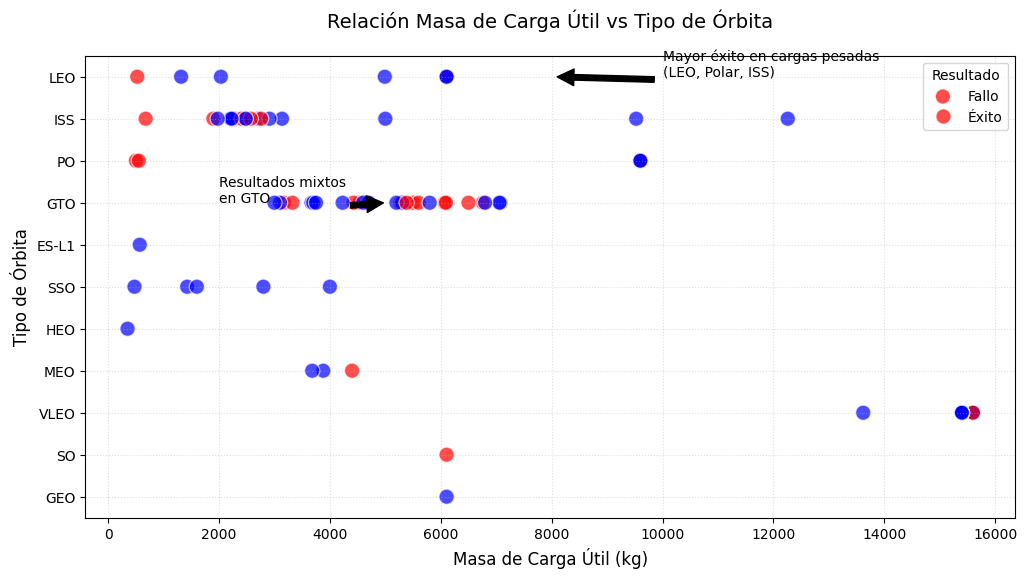

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    data=df,
    palette={0: 'red', 1: 'blue'},  # 0=Fallo, 1=Éxito
    s=120,
    alpha=0.7
)

# Personalización del gráfico
plt.title('Relación Masa de Carga Útil vs Tipo de Órbita', fontsize=14, pad=20)
plt.xlabel('Masa de Carga Útil (kg)', fontsize=12)
plt.ylabel('Tipo de Órbita', fontsize=12)
plt.legend(title='Resultado', labels=['Fallo', 'Éxito'])
plt.grid(True, linestyle=':', alpha=0.4)

# Anotaciones clave
plt.annotate('Mayor éxito en cargas pesadas\n(LEO, Polar, ISS)',
             xy=(8000, 'LEO'),
             xytext=(10000, 'LEO'),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Resultados mixtos\nen GTO',
             xy=(5000, 'GTO'),
             xytext=(2000, 'GTO'),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

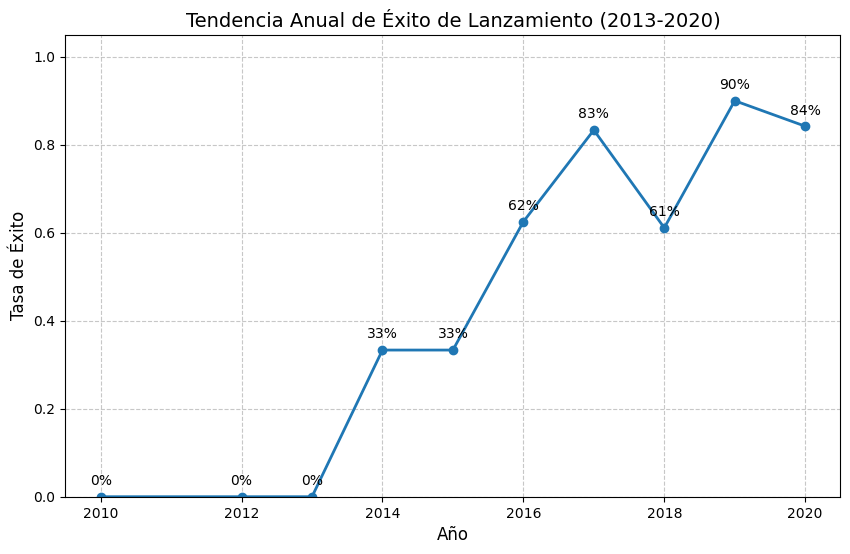

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer el año de la fecha (versión optimizada)
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calcular tasa de éxito anual
success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Configurar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(success_rate['Year'], success_rate['Class'], 
         marker='o', 
         linestyle='-', 
         linewidth=2,
         color='#1f77b4')

# Personalización
plt.title('Tendencia Anual de Éxito de Lanzamiento (2013-2020)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa de Éxito', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir valores exactos
for x, y in zip(success_rate['Year'], success_rate['Class']):
    plt.text(x, y+0.02, f'{y:.0%}', ha='center', va='bottom')

plt.show()

In [11]:
features = df[[
    'FlightNumber',   # Número de vuelo (experiencia acumulada)
    'PayloadMass',    # Masa de carga útil (kg)
    'Orbit',          # Tipo de órbita (LEO, GTO, etc.)
    'LaunchSite',     # Sitio de lanzamiento (CCAFS, VSFB)
    'Flights',        # Número de vuelos del booster
    'GridFins',       # Uso de aletas de rejilla (True/False)
    'Reused',         # Booster reutilizado (True/False)
    'Legs',           # Uso de patas de aterrizaje (True/False)
    'LandingPad',     # Plataforma de aterrizaje
    'Block',          # Versión del bloque del booster
    'ReusedCount',    # Veces reutilizado
    'Serial'          # Número de serie del booster
]]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [12]:
# Aplicar One-Hot Encoding a las columnas categóricas
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    prefix=['Orbit', 'Site', 'Pad', 'Serial']
)

# Mostrar las primeras filas
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Convertir todas las columnas a float64
features_one_hot = features_one_hot.astype('float64')

# Verificar tipos de datos
print(features_one_hot.dtypes)

# Exportar a CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object
